## Import Linbraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize as op
from scipy.optimize import curve_fit
import math
import torch
import os

maxfev: This specifies the maximum number of function evaluations allowed during the optimization process.

p0: This is an optional argument that specifies the initial guess for the parameters of the model function.

bounds: This is an optional argument that specifies the lower and upper bounds on the parameters.

In [2]:
def fit_curve_act(function, maxfev, p0, bounds, name, columns, folder, popts):
    # data_size = data.shape[0]
    # data_stats = data.shape[1]

    x = np.linspace(-2, 2, 4001)
    result = []
    
    save_folder = f'{folder}/{name}'
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)
        
    df = pd.DataFrame(columns=columns)
    df[columns[0]] = x

    for k, column in enumerate(columns[1:]):
        # y = data[:, k]
        # popt, _ = curve_fit(function, x, y, maxfev=maxfev, p0=p0, bounds=bounds)
        df[column] = function(x, *popts[k])
        
        # eta_1, eta_2, eta_3, eta_4 = popt
        # result.append(list(popt))
        
        # print('size of x, y:', x.shape, y.shape)

        # plt.figure()
        # plt.plot(x, y, color='green', label='SPICE')
        # plt.plot(x, function(x, *popt), '--', color='red', label='Fitting')
        # plt.xlim(-2, 2)
        # plt.legend()
        # plt.savefig(f'./{save_folder}/{name}{k}.pdf', format='pdf', bbox_inches='tight')
        # plt.close()
        
    # Save the dataframe to a CSV file
    df.to_csv(f'./{save_folder}/{name}_predicted.csv', index=False)
        
        
    return result

In [3]:
popts = np.array([[ 8.3907e-01, -1.0000e+00,  0.0000e+00,  2.0978e-17],
        [-6.0647e-01, -1.0000e+00,  0.0000e+00,  1.0867e-08],
        [-9.9992e-01, -1.0000e+00,  0.0000e+00, -4.5596e-18],
        [ 8.3907e-01, -1.0000e+00,  0.0000e+00, -1.8533e-17],
        [ 3.1485e+01,  2.8551e-03, -9.9980e-02,  6.3016e+00],
        [-1.0000e+00, -1.0000e+00,  0.0000e+00,  4.4070e-16],
        [ 1.8307e+02, -1.8394e+02, -8.3575e+01,  4.2966e-02],
        [-6.0647e-01, -1.0000e+00,  0.0000e+00,  1.0867e-08],
        [ 1.2159e-01, -7.3578e-01, -7.9441e-02,  3.1090e+00],
        [ 8.3907e-01, -1.0000e+00,  0.0000e+00,  2.0978e-17],
        [-9.9992e-01, -1.0000e+00,  0.0000e+00, -4.5596e-18],
        [ 7.6517e-01, -8.0291e-03,  6.3714e-01,  1.2184e+00],
        [ 8.3907e-01, -1.0000e+00,  0.0000e+00,  2.0978e-17],
        [ 8.3907e-01, -1.0000e+00,  0.0000e+00, -1.8533e-17],
        [-1.0000e+00, -1.0000e+00,  0.0000e+00,  4.4070e-16],
        [ 1.0000e+00, -1.0000e+00,  0.0000e+00,  4.4982e-16],
        [-4.5913e-02, -7.2633e-01,  7.3493e-02,  1.0507e+01],
        [-9.9992e-01, -1.0000e+00,  0.0000e+00, -4.5596e-18]],
       dtype=np.float64)

len(popts)

18

In [4]:
columns = ['X', 'R1_open Y', 'R1_short Y','R2_open Y',	'R2_short Y',	'R3_open Y',	'R3_short Y',	'M1_G-S_short Y',	'M1_open Y',	'M1_G-D_short Y',	'M1_D-S_short Y',	'M2_D-S_short Y',	'M2_G-D_short Y',	'M2_G-S_short Y',	'M2_open Y',	'M3_open Y',	'M3_D-S_short Y',	'M3_G-D_short Y',	'M3_G-S_short Y']
len(columns)

19

In [5]:
maxfev=1000000
p0=[0., -1., 0., 0.]
bounds=([-np.inf, -np.inf, -np.inf, -np.inf], [np.inf, np.inf, np.inf, np.inf])
ptanh_result = fit_curve_act(inverter, name='Inv', maxfev=maxfev, p0=p0, bounds=bounds, folder='./v3_SimulationDataset/single_fault/faulty/figures', columns=columns, popts=popts)

NameError: name 'inverter' is not defined

In [9]:
def fit_curve_act_1(data, function, name, folder):
    data_size = data.shape[0]
    data_stats = data.shape[1]
    
    popts = torch.tensor([[ 8.3907e-01, -1.0000e+00,  0.0000e+00,  2.0978e-17],
        [-6.0647e-01, -1.0000e+00,  0.0000e+00,  1.0867e-08],
        [-9.9992e-01, -1.0000e+00,  0.0000e+00, -4.5596e-18],
        [ 8.3907e-01, -1.0000e+00,  0.0000e+00, -1.8533e-17],
        [ 3.1485e+01,  2.8551e-03, -9.9980e-02,  6.3016e+00],
        [-1.0000e+00, -1.0000e+00,  0.0000e+00,  4.4070e-16],
        [ 1.8307e+02, -1.8394e+02, -8.3575e+01,  4.2966e-02],
        [-6.0647e-01, -1.0000e+00,  0.0000e+00,  1.0867e-08],
        [ 1.2159e-01, -7.3578e-01, -7.9441e-02,  3.1090e+00],
        [ 8.3907e-01, -1.0000e+00,  0.0000e+00,  2.0978e-17],
        [-9.9992e-01, -1.0000e+00,  0.0000e+00, -4.5596e-18],
        [ 7.6517e-01, -8.0291e-03,  6.3714e-01,  1.2184e+00],
        [ 8.3907e-01, -1.0000e+00,  0.0000e+00,  2.0978e-17],
        [ 8.3907e-01, -1.0000e+00,  0.0000e+00, -1.8533e-17],
        [-1.0000e+00, -1.0000e+00,  0.0000e+00,  4.4070e-16],
        [ 1.0000e+00, -1.0000e+00,  0.0000e+00,  4.4982e-16],
        [-4.5913e-02, -7.2633e-01,  7.3493e-02,  1.0507e+01],
        [-9.9992e-01, -1.0000e+00,  0.0000e+00, -4.5596e-18]],
       dtype=torch.float64)

    x = np.linspace(-2, 2, data_size)
    result = []

    for k, popt in enumerate(popts):
        # eta_1, eta_2, eta_3, eta_4 = popt
        result.append(list(popt))
        y = data[:, k]

        plt.figure()
        plt.plot(x, y, color='green', label='SPICE')
        plt.plot(x, function(x, *popt), '--', color='red', label='Fitting')
        plt.xlim(-2, 2)
        plt.legend()
        plt.savefig(f'./{folder}/{name}{k}.pdf', format='pdf', bbox_inches='tight')
        plt.close()
        
    return result

In [ ]:
fit_curve_act_1(data, function, name, folder)
fit_curve_act(ninverter_data, inverter, name='inverter', folder='./v3_SimulationDataset/single_fault/non-faulty_curves_for_both/figures', maxfev=maxfev, p0=p0, bounds=bounds)

## Inverter

In [22]:
def inverter(x, eta1,eta2,eta3,eta4):
    return -(eta1 + eta2 * np.tanh((x - eta3) * eta4))

### Faulty Circuit

In [9]:
data = torch.load('./neg_fault.data').numpy()
data.shape

FileNotFoundError: [Errno 2] No such file or directory: './neg_fault.data'

In [4]:
x = np.linspace(-2, 2, 4001)
result = []

k = 0
y = data[:, k]
popt, _ = curve_fit(f, x, y, maxfev=1000000, p0=[0., -1., 0., 0.], bounds=([-np.inf, -np.inf, -np.inf, -np.inf], [np.inf, np.inf, np.inf, np.inf]))
eta_1, eta_2, eta_3, eta_4 = popt
result.append([eta_1, eta_2, eta_3, eta_4])

plt.figure()
plt.plot(x, y, color='green', label='SPICE')
plt.plot(x, f(x, *popt), '--', color='red', label='Fitting')
plt.xlim(-2, 2)
plt.legend()
plt.savefig(f'./neg{k}.pdf', format='pdf', bbox_inches='tight')
plt.close()

/Users/haibinzhao/miniconda3/envs/ML/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [5]:
k = 1
y = data[:, k]
popt, _ = curve_fit(f, x, y, maxfev=1000000, p0=[0., -1., 0., 0.], bounds=([-np.inf, -np.inf, -np.inf, -np.inf], [np.inf, np.inf, np.inf, np.inf]))
eta_1, eta_2, eta_3, eta_4 = popt
result.append([eta_1, eta_2, eta_3, eta_4])

plt.figure()
plt.plot(x, y, color='green', label='SPICE')
plt.plot(x, f(x, *popt), '--', color='red', label='Fitting')
plt.xlim(-2, 2)
plt.legend()
plt.savefig(f'./neg{k}.pdf', format='pdf', bbox_inches='tight')
plt.close()

In [6]:
k = 2
y = data[:, k]
popt, _ = curve_fit(f, x, y, maxfev=1000000, p0=[0., -1., 0., 0.], bounds=([-np.inf, -np.inf, -np.inf, -np.inf], [np.inf, np.inf, np.inf, np.inf]))
eta_1, eta_2, eta_3, eta_4 = popt
result.append([eta_1, eta_2, eta_3, eta_4])

plt.figure()
plt.plot(x, y, color='green', label='SPICE')
plt.plot(x, f(x, *popt), '--', color='red', label='Fitting')
plt.xlim(-2, 2)
plt.legend()
plt.savefig(f'./neg{k}.pdf', format='pdf', bbox_inches='tight')
plt.close()

/Users/haibinzhao/miniconda3/envs/ML/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [7]:
k = 3
y = data[:, k]
popt, _ = curve_fit(f, x, y, maxfev=1000000, p0=[0., -1., 0., 0.], bounds=([-np.inf, -np.inf, -np.inf, -np.inf], [np.inf, np.inf, np.inf, np.inf]))
eta_1, eta_2, eta_3, eta_4 = popt
result.append([eta_1, eta_2, eta_3, eta_4])

plt.figure()
plt.plot(x, y, color='green', label='SPICE')
plt.plot(x, f(x, *popt), '--', color='red', label='Fitting')
plt.xlim(-2, 2)
plt.legend()
plt.savefig(f'./neg{k}.pdf', format='pdf', bbox_inches='tight')
plt.close()

/Users/haibinzhao/miniconda3/envs/ML/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [8]:
k = 4
y = data[:, k]
popt, _ = curve_fit(f, x, y, maxfev=1000000, p0=[0., 1., 0., 1.], bounds=([-np.inf, 0, -np.inf, 0], [np.inf, np.inf, np.inf, np.inf]))
eta_1, eta_2, eta_3, eta_4 = popt
result.append([eta_1, eta_2, eta_3, eta_4])

plt.figure()
plt.plot(x, y, color='green', label='SPICE')
plt.plot(x, f(x, *popt), '--', color='red', label='Fitting')
plt.xlim(-2, 2)
plt.legend()
plt.savefig(f'./neg{k}.pdf', format='pdf', bbox_inches='tight')
plt.close()

In [9]:
k = 5
y = data[:, k]
popt, _ = curve_fit(f, x, y, maxfev=1000000, p0=[0., -1., 0., 0.], bounds=([-np.inf, -np.inf, -np.inf, -np.inf], [np.inf, np.inf, np.inf, np.inf]))
eta_1, eta_2, eta_3, eta_4 = popt
result.append([eta_1, eta_2, eta_3, eta_4])

plt.figure()
plt.plot(x, y, color='green', label='SPICE')
plt.plot(x, f(x, *popt), '--', color='red', label='Fitting')
plt.xlim(-2, 2)
plt.legend()
plt.savefig(f'./neg{k}.pdf', format='pdf', bbox_inches='tight')
plt.close()

/Users/haibinzhao/miniconda3/envs/ML/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [10]:
k = 6
y = data[:, k]
popt, _ = curve_fit(f, x, y, maxfev=1000000, p0=[0., -1., 0., 0.], bounds=([-np.inf, -np.inf, -np.inf, -np.inf], [np.inf, np.inf, np.inf, np.inf]))
eta_1, eta_2, eta_3, eta_4 = popt
result.append([eta_1, eta_2, eta_3, eta_4])

plt.figure()
plt.plot(x, y, color='green', label='SPICE')
plt.plot(x, f(x, *popt), '--', color='red', label='Fitting')
plt.xlim(-2, 2)
plt.legend()
plt.savefig(f'./neg{k}.pdf', format='pdf', bbox_inches='tight')
plt.close()

In [11]:
k = 7
y = data[:, k]
popt, _ = curve_fit(f, x, y, maxfev=1000000, p0=[0., -1., 0., 0.], bounds=([-np.inf, -np.inf, -np.inf, -np.inf], [np.inf, np.inf, np.inf, np.inf]))
eta_1, eta_2, eta_3, eta_4 = popt
result.append([eta_1, eta_2, eta_3, eta_4])

plt.figure()
plt.plot(x, y, color='green', label='SPICE')
plt.plot(x, f(x, *popt), '--', color='red', label='Fitting')
plt.xlim(-2, 2)
plt.legend()
plt.savefig(f'./neg{k}.pdf', format='pdf', bbox_inches='tight')
plt.close()

In [12]:
k = 8
y = data[:, k]
popt, _ = curve_fit(f, x, y, maxfev=1000000, p0=[0., -1., 0., 0.], bounds=([-np.inf, -np.inf, -np.inf, -np.inf], [np.inf, np.inf, np.inf, np.inf]))
eta_1, eta_2, eta_3, eta_4 = popt
result.append([eta_1, eta_2, eta_3, eta_4])

plt.figure()
plt.plot(x, y, color='green', label='SPICE')
plt.plot(x, f(x, *popt), '--', color='red', label='Fitting')
plt.xlim(-2, 2)
plt.legend()
plt.savefig(f'./neg{k}.pdf', format='pdf', bbox_inches='tight')
plt.close()

In [13]:
k = 9
y = data[:, k]
popt, _ = curve_fit(f, x, y, maxfev=1000000, p0=[0., -1., 0., 0.], bounds=([-np.inf, -np.inf, -np.inf, -np.inf], [np.inf, np.inf, np.inf, np.inf]))
eta_1, eta_2, eta_3, eta_4 = popt
result.append([eta_1, eta_2, eta_3, eta_4])

plt.figure()
plt.plot(x, y, color='green', label='SPICE')
plt.plot(x, f(x, *popt), '--', color='red', label='Fitting')
plt.xlim(-2, 2)
plt.legend()
plt.savefig(f'./neg{k}.pdf', format='pdf', bbox_inches='tight')
plt.close()

/Users/haibinzhao/miniconda3/envs/ML/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [14]:
k = 10
y = data[:, k]
popt, _ = curve_fit(f, x, y, maxfev=1000000, p0=[0., -1., 0., 0.], bounds=([-np.inf, -np.inf, -np.inf, -np.inf], [np.inf, np.inf, np.inf, np.inf]))
eta_1, eta_2, eta_3, eta_4 = popt
result.append([eta_1, eta_2, eta_3, eta_4])

plt.figure()
plt.plot(x, y, color='green', label='SPICE')
plt.plot(x, f(x, *popt), '--', color='red', label='Fitting')
plt.xlim(-2, 2)
plt.legend()
plt.savefig(f'./neg{k}.pdf', format='pdf', bbox_inches='tight')
plt.close()

/Users/haibinzhao/miniconda3/envs/ML/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [15]:
k = 11
y = data[:, k]
popt, _ = curve_fit(f, x, y, maxfev=1000000, p0=[0., -1., 0., 0.], bounds=([-np.inf, -np.inf, -np.inf, -np.inf], [np.inf, np.inf, np.inf, np.inf]))
eta_1, eta_2, eta_3, eta_4 = popt
result.append([eta_1, eta_2, eta_3, eta_4])

plt.figure()
plt.plot(x, y, color='green', label='SPICE')
plt.plot(x, f(x, *popt), '--', color='red', label='Fitting')
plt.xlim(-2, 2)
plt.legend()
plt.savefig(f'./neg{k}.pdf', format='pdf', bbox_inches='tight')
plt.close()

In [16]:
k = 12
y = data[:, k]
popt, _ = curve_fit(f, x, y, maxfev=1000000, p0=[0., -1., 0., 0.], bounds=([-np.inf, -np.inf, -np.inf, -np.inf], [np.inf, np.inf, np.inf, np.inf]))
eta_1, eta_2, eta_3, eta_4 = popt
result.append([eta_1, eta_2, eta_3, eta_4])

plt.figure()
plt.plot(x, y, color='green', label='SPICE')
plt.plot(x, f(x, *popt), '--', color='red', label='Fitting')
plt.xlim(-2, 2)
plt.legend()
plt.savefig(f'./neg{k}.pdf', format='pdf', bbox_inches='tight')
plt.close()

/Users/haibinzhao/miniconda3/envs/ML/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [17]:
k = 13
y = data[:, k]
popt, _ = curve_fit(f, x, y, maxfev=1000000, p0=[0., -1., 0., 0.], bounds=([-np.inf, -np.inf, -np.inf, -np.inf], [np.inf, np.inf, np.inf, np.inf]))
eta_1, eta_2, eta_3, eta_4 = popt
result.append([eta_1, eta_2, eta_3, eta_4])

plt.figure()
plt.plot(x, y, color='green', label='SPICE')
plt.plot(x, f(x, *popt), '--', color='red', label='Fitting')
plt.xlim(-2, 2)
plt.legend()
plt.savefig(f'./neg{k}.pdf', format='pdf', bbox_inches='tight')
plt.close()

/Users/haibinzhao/miniconda3/envs/ML/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [18]:
k = 14
y = data[:, k]
popt, _ = curve_fit(f, x, y, maxfev=1000000, p0=[0., -1., 0., 0.], bounds=([-np.inf, -np.inf, -np.inf, -np.inf], [np.inf, np.inf, np.inf, np.inf]))
eta_1, eta_2, eta_3, eta_4 = popt
result.append([eta_1, eta_2, eta_3, eta_4])

plt.figure()
plt.plot(x, y, color='green', label='SPICE')
plt.plot(x, f(x, *popt), '--', color='red', label='Fitting')
plt.xlim(-2, 2)
plt.legend()
plt.savefig(f'./neg{k}.pdf', format='pdf', bbox_inches='tight')
plt.close()

/Users/haibinzhao/miniconda3/envs/ML/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [19]:
k = 15
y = data[:, k]
popt, _ = curve_fit(f, x, y, maxfev=1000000, p0=[0., -1., 0., 0.], bounds=([-np.inf, -np.inf, -np.inf, -np.inf], [np.inf, np.inf, np.inf, np.inf]))
eta_1, eta_2, eta_3, eta_4 = popt
result.append([eta_1, eta_2, eta_3, eta_4])

plt.figure()
plt.plot(x, y, color='green', label='SPICE')
plt.plot(x, f(x, *popt), '--', color='red', label='Fitting')
plt.xlim(-2, 2)
plt.legend()
plt.savefig(f'./neg{k}.pdf', format='pdf', bbox_inches='tight')
plt.close()

/Users/haibinzhao/miniconda3/envs/ML/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [20]:
k = 16
y = data[:, k]
popt, _ = curve_fit(f, x, y, maxfev=1000000, p0=[0., -1., 0., 0.], bounds=([-np.inf, -np.inf, -np.inf, -np.inf], [np.inf, np.inf, np.inf, np.inf]))
eta_1, eta_2, eta_3, eta_4 = popt
result.append([eta_1, eta_2, eta_3, eta_4])

plt.figure()
plt.plot(x, y, color='green', label='SPICE')
plt.plot(x, f(x, *popt), '--', color='red', label='Fitting')
plt.xlim(-2, 2)
plt.legend()
plt.savefig(f'./neg{k}.pdf', format='pdf', bbox_inches='tight')
plt.close()

In [21]:
k = 17
y = data[:, k]
popt, _ = curve_fit(f, x, y, maxfev=1000000, p0=[0., -1., 0., 0.], bounds=([-np.inf, -np.inf, -np.inf, -np.inf], [np.inf, np.inf, np.inf, np.inf]))
eta_1, eta_2, eta_3, eta_4 = popt
result.append([eta_1, eta_2, eta_3, eta_4])

plt.figure()
plt.plot(x, y, color='green', label='SPICE')
plt.plot(x, f(x, *popt), '--', color='red', label='Fitting')
plt.xlim(-2, 2)
plt.legend()
plt.savefig(f'./neg{k}.pdf', format='pdf', bbox_inches='tight')
plt.close()

/Users/haibinzhao/miniconda3/envs/ML/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [22]:
a = torch.tensor(result)
a.shape

torch.Size([18, 4])

In [23]:
a

tensor([[ 8.3907e-01, -1.0000e+00,  0.0000e+00,  2.0978e-17],
        [-6.0647e-01, -1.0000e+00,  0.0000e+00,  1.0867e-08],
        [-9.9992e-01, -1.0000e+00,  0.0000e+00, -4.5596e-18],
        [ 8.3907e-01, -1.0000e+00,  0.0000e+00, -1.8533e-17],
        [ 3.1485e+01,  2.8551e-03, -9.9980e-02,  6.3016e+00],
        [-1.0000e+00, -1.0000e+00,  0.0000e+00,  4.4070e-16],
        [ 1.8307e+02, -1.8394e+02, -8.3575e+01,  4.2966e-02],
        [-6.0647e-01, -1.0000e+00,  0.0000e+00,  1.0867e-08],
        [ 1.2159e-01, -7.3578e-01, -7.9441e-02,  3.1090e+00],
        [ 8.3907e-01, -1.0000e+00,  0.0000e+00,  2.0978e-17],
        [-9.9992e-01, -1.0000e+00,  0.0000e+00, -4.5596e-18],
        [ 7.6517e-01, -8.0291e-03,  6.3714e-01,  1.2184e+00],
        [ 8.3907e-01, -1.0000e+00,  0.0000e+00,  2.0978e-17],
        [ 8.3907e-01, -1.0000e+00,  0.0000e+00, -1.8533e-17],
        [-1.0000e+00, -1.0000e+00,  0.0000e+00,  4.4070e-16],
        [ 1.0000e+00, -1.0000e+00,  0.0000e+00,  4.4982e-16],
        

### Non Faulty Circuit

In [ ]:
inverter_data = torch.load('./v3_SimulationDataset/single_fault/non-faulty_curves_for_both/neg_fault.data').numpy()
inverter_data.shape

In [7]:
ninverter_data = torch.load('./v3_SimulationDataset/single_fault/non-faulty_curves_for_both/neg_fault.data').numpy()
ninverter_data.shape

(4001, 1)

In [8]:
columns = ['X', 'Y']
len(columns)

2

In [9]:
maxfev=1000000
p0=[0., -1., 0., 0.]
bounds=([-np.inf, -np.inf, -np.inf, -np.inf], [np.inf, np.inf, np.inf, np.inf])
ninverter_result = fit_curve_act(ninverter_data, inverter, name='inverter', folder='./v3_SimulationDataset/single_fault/non-faulty_curves_for_both/figures', maxfev=maxfev, p0=p0, bounds=bounds, columns=columns)

size of x, y: (4001,) (4001,)


In [10]:
ninverter_a = torch.tensor(ninverter_result)
ninverter_a.shape

torch.Size([1, 4])

In [11]:
ninverter_a

tensor([[-4.4411e-02, -9.5086e-01, -1.6900e-02, -1.4223e+02]],
       dtype=torch.float64)

# Fault Modeling

In [ ]:
def fit_curve_act(function):
    fault_free_etas = (-4.4411e-02, -9.5086e-01, -1.6900e-02, -1.4223e+02)

    popts = np.array([[ 8.3907e-01, -1.0000e+00,  0.0000e+00,  2.0978e-17],
        [-6.0647e-01, -1.0000e+00,  0.0000e+00,  1.0867e-08],
        [-9.9992e-01, -1.0000e+00,  0.0000e+00, -4.5596e-18],
        [ 8.3907e-01, -1.0000e+00,  0.0000e+00, -1.8533e-17],
        [ 3.1485e+01,  2.8551e-03, -9.9980e-02,  6.3016e+00],
        [-1.0000e+00, -1.0000e+00,  0.0000e+00,  4.4070e-16],
        [ 1.8307e+02, -1.8394e+02, -8.3575e+01,  4.2966e-02],
        [-6.0647e-01, -1.0000e+00,  0.0000e+00,  1.0867e-08],
        [ 1.2159e-01, -7.3578e-01, -7.9441e-02,  3.1090e+00],
        [ 8.3907e-01, -1.0000e+00,  0.0000e+00,  2.0978e-17],
        [-9.9992e-01, -1.0000e+00,  0.0000e+00, -4.5596e-18],
        [ 7.6517e-01, -8.0291e-03,  6.3714e-01,  1.2184e+00],
        [ 8.3907e-01, -1.0000e+00,  0.0000e+00,  2.0978e-17],
        [ 8.3907e-01, -1.0000e+00,  0.0000e+00, -1.8533e-17],
        [-1.0000e+00, -1.0000e+00,  0.0000e+00,  4.4070e-16],
        [ 1.0000e+00, -1.0000e+00,  0.0000e+00,  4.4982e-16],
        [-4.5913e-02, -7.2633e-01,  7.3493e-02,  1.0507e+01],
        [-9.9992e-01, -1.0000e+00,  0.0000e+00, -4.5596e-18]],
       dtype=np.float64)
    
    data_size = 4001

    x = np.linspace(-2, 2, data_size)
    result = []
    
    # Generate colors from a colormap
    colors = plt.cm.tab20.colors
    plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization
    # plt.plot(x, function(x, *fault_free_etas), color=colors[0], label='fault free')
    # result.append(fault_free_etas)
    
    for k, popt in enumerate(popts):
        result.append(popt)
        if k == 4:
            continue
        plt.plot(x, function(x, *popt), '--', color=colors[k + 1], label=f'fault {k + 1}')
    
    # Place the legend outside the plot
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small', title="Curves")
    plt.xlim(-2, 2)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Curve Fitting with Fault Data")
    plt.tight_layout()  # Adjust layout to accommodate legend
    
    plt.show()
        
    return x, result


In [15]:
import numpy as np
import matplotlib.pyplot as plt

def fit_curve_act2(function):
    fault_free_etas = (-4.4411e-02, -9.5086e-01, -1.6900e-02, -1.4223e+02)

    popts = np.array([[ 8.3907e-01, -1.0000e+00,  0.0000e+00,  2.0978e-17],
        [-6.0647e-01, -1.0000e+00,  0.0000e+00,  1.0867e-08],
        [-9.9992e-01, -1.0000e+00,  0.0000e+00, -4.5596e-18],
        [ 8.3907e-01, -1.0000e+00,  0.0000e+00, -1.8533e-17],
        [ 3.1485e+01,  2.8551e-03, -9.9980e-02,  6.3016e+00],
        [-1.0000e+00, -1.0000e+00,  0.0000e+00,  4.4070e-16],
        [ 1.8307e+02, -1.8394e+02, -8.3575e+01,  4.2966e-02],
        [-6.0647e-01, -1.0000e+00,  0.0000e+00,  1.0867e-08],
        [ 1.2159e-01, -7.3578e-01, -7.9441e-02,  3.1090e+00],
        [ 8.3907e-01, -1.0000e+00,  0.0000e+00,  2.0978e-17],
        [-9.9992e-01, -1.0000e+00,  0.0000e+00, -4.5596e-18],
        [ 7.6517e-01, -8.0291e-03,  6.3714e-01,  1.2184e+00],
        [ 8.3907e-01, -1.0000e+00,  0.0000e+00,  2.0978e-17],
        [ 8.3907e-01, -1.0000e+00,  0.0000e+00, -1.8533e-17],
        [-1.0000e+00, -1.0000e+00,  0.0000e+00,  4.4070e-16],
        [ 1.0000e+00, -1.0000e+00,  0.0000e+00,  4.4982e-16],
        [-4.5913e-02, -7.2633e-01,  7.3493e-02,  1.0507e+01],
        [-9.9992e-01, -1.0000e+00,  0.0000e+00, -4.5596e-18]],
       dtype=np.float64)

    data_size = 4001
    x = np.linspace(-2, 2, data_size)

    # Fault-free curve
    fault_free_y = function(x, *fault_free_etas)

    # Plot all curves
    plt.figure(figsize=(4, 3))
    plt.subplot(1, 1, 1)
    colors = plt.cm.tab20.colors
    plt.plot(x, fault_free_y, color='green', label='Fault-Free', linewidth=3)

    offset = 0.04  # Offset to separate overlapping curves visually
    alpha = 0.8   # Transparency for overlapping curves
    markers = ['o', 's', 'd', '^', 'v']  # Add markers for distinguishability
    
    for k, popt in enumerate(popts):
        y = function(x, *popt)
        adjusted_y = y + (k % 5) * offset  # Add slight vertical offset to avoid overlap
        if k==4:
            continue
        plt.plot(x, adjusted_y, '--', alpha=alpha, color=colors[(k + 1) % len(colors)], 
                 marker=markers[k % len(markers)], markevery=500, markersize=1, linewidth=2)

    # Add a single legend entry for "Faulty" (dummy line for legend)
    plt.plot([], [], linestyle='--', color='gray', linewidth=2, label='Faulty')

    plt.legend(loc='center left', fontsize=12, ncol=1)
    plt.xlabel("V$_{in}$(v)", fontsize=18, )
    plt.ylabel("V$_{out}$(v)", fontsize=18, )
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    # plt.title("Curve Fitting with Fault Data (Adjusted for Overlaps)")
    # plt.tight_layout()
    plt.show()

    return x


In [ ]:
def inverter(x, eta1, eta2, eta3, eta4):
    return -(eta1 + eta2 * np.tanh((x - eta3) * eta4))

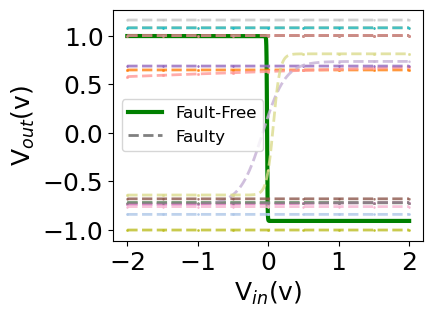

In [16]:
x = fit_curve_act2(inverter)

Euclidean k-means


NameError: name 'n_clusters' is not defined

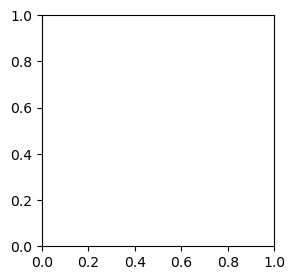

In [17]:
colors = plt.cm.tab20.colors

plt.figure(figsize=(3, 3))

# Euclidean k-means
print("Euclidean k-means")
plt.subplot(1, 1, 1)
for yi in range(n_clusters):
    if yi == 1:
        continue
    for j, xx in enumerate(X_train[y_pred_euc == yi]):
        plt.plot(x, xx.ravel(), '--', color=colors[yi], label='fault {}'.format(label[y_pred_euc == yi][0][0]), alpha=0.1)
    plt.plot(x, km.cluster_centers_[yi].ravel(), color=colors[yi], linewidth=3)
    
    plt.xlim(-2, 2)
    # plt.legend()
    plt.xlabel("V$_{in}$(v)", fontsize=18, )
    plt.ylabel("V$_{out}$(v)", fontsize=18, )
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    
    if yi == 1:
        plt.title("Euclidean $k$-means")

: 

: 

: 

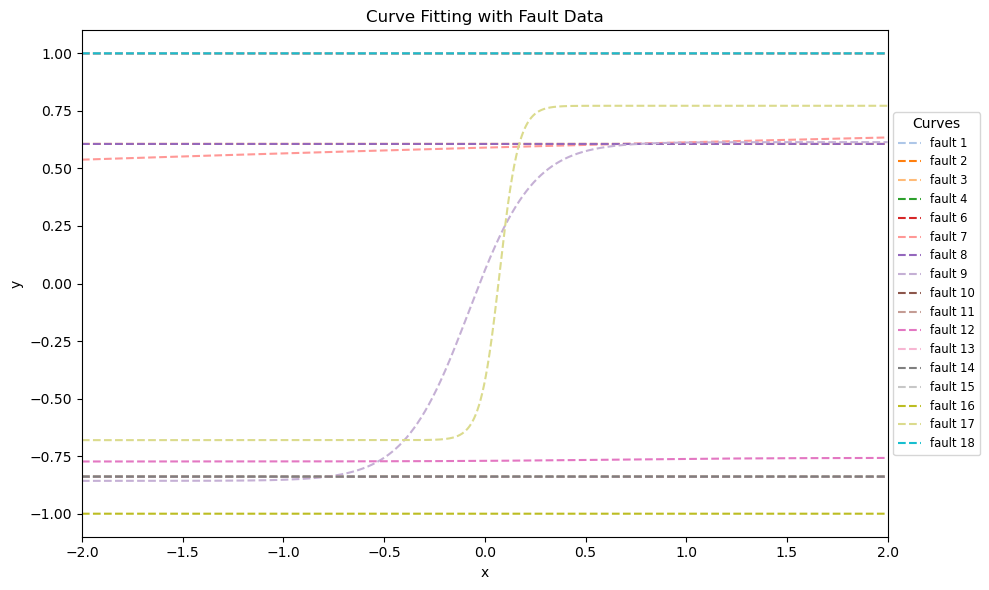

In [18]:
x, inv_result = fit_curve_act(inverter)

In [19]:
y = [inverter(x, *inv_result[i]) for i in range(len(inv_result))]
y = np.array(y)
label = np.array(range(len(y)))
np.expand_dims(y, axis=2).shape, np.expand_dims(label, axis=1).shape

((18, 4001, 1), (18, 1))

Testing 5 clusters...
Testing 6 clusters...
Testing 7 clusters...
Testing 8 clusters...
Testing 9 clusters...
Testing 10 clusters...
Testing 11 clusters...
Testing 12 clusters...
Testing 13 clusters...
Testing 14 clusters...
Testing 15 clusters...
Testing 16 clusters...
Testing 17 clusters...
Testing 18 clusters...
Processed clusters: 14


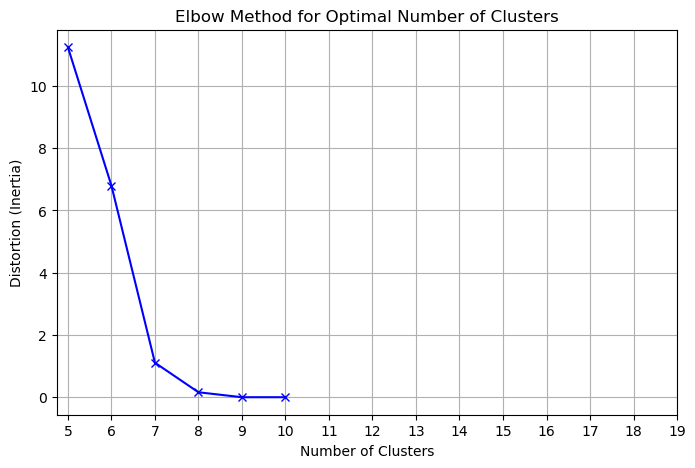

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler

# Assuming ptanh and ptanh_result are defined elsewhere
# Prepare data
y = [inverter(x, *inv_result[i]) for i in range(len(inv_result))]
y = np.array(y)
label = np.array(range(len(y)))
y = np.expand_dims(y, axis=2)
label = np.expand_dims(label, axis=1)

# Preprocessing
# X_train = TimeSeriesScalerMeanVariance().fit_transform(y[:19])
X_train = y[:18]
X_train = TimeSeriesResampler(sz=4001).fit_transform(X_train)

# Elbow method
distortions = []
K_range = range(5, 19)  # Test 5 to 19 clusters

for k in K_range:
    try:
        print(f"Testing {k} clusters...")  # Debugging: Log each cluster test
        km = TimeSeriesKMeans(n_clusters=k, verbose=False, random_state=0)
        km.fit(X_train)
        distortions.append(km.inertia_)  # Sum of squared distances to the closest centroid
    except Exception as e:
        print(f"Error for {k} clusters: {e}")
        break  # Exit the loop if an error occurs

# Check if the entire range was processed
print(f"Processed clusters: {len(distortions)}")

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(range(5, 5 + len(distortions)), distortions, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(range(5, 20))  # Ensure all tested clusters are shown
plt.grid()
plt.show()


In [21]:
# Author: Romain Tavenard
# License: BSD 3 clause

import numpy
import matplotlib.pyplot as plt

from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, \
    TimeSeriesResampler
    
y = [inverter(x, *inv_result[i]) for i in range(len(inv_result))]
y = np.array(y)
label = np.array(range(len(y)))
np.expand_dims(y, axis=2).shape, np.expand_dims(label, axis=1).shape

seed = 0
numpy.random.seed(seed)
# X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")
# X_train = X_train[y_train < 4]  # Keep first 3 classes
# numpy.random.shuffle(X_train)
# Keep only 50 time series
y = np.expand_dims(y, axis=2)
label = np.expand_dims(label, axis=1)

# X_train = TimeSeriesScalerMeanVariance().fit_transform(y[:19])
# Make time series shorter
X_train = TimeSeriesResampler(sz=4001).fit_transform(y[:18])
sz = X_train.shape[1]

# Euclidean k-means
print("Euclidean k-means")
n_clusters = 9
km = TimeSeriesKMeans(n_clusters=n_clusters, verbose=True, random_state=seed)
y_pred_euc = km.fit_predict(X_train)

Euclidean k-means
0.000 --> 0.000 --> 0.000 --> 


In [22]:
X_train.shape

(18, 4001, 1)

In [23]:
import numpy as np
from tslearn.metrics import cdist_dtw  # Use DTW if necessary, or stick to Euclidean

# Calculate centroids
centroids = km.cluster_centers_

# Find the closest transfer function to each centroid
closest_indices = []
for cluster_id in range(n_clusters):
    # Get the indices of time series in the current cluster
    cluster_indices = np.where(y_pred_euc == cluster_id)[0]
    cluster_transfers = X_train[cluster_indices]
    
    # Compute distances to the centroid
    distances = np.linalg.norm(cluster_transfers - centroids[cluster_id], axis=(1, 2))
    
    # Find the index of the closest transfer function
    closest_index_within_cluster = np.argmin(distances)
    closest_global_index = cluster_indices[closest_index_within_cluster]
    
    # Store the global index of the closest transfer function
    closest_indices.append(closest_global_index)

print("Closest transfer function indices for each cluster:", closest_indices)


Closest transfer function indices for each cluster: [0, 4, 1, 16, 2, 15, 8, 11, 6]


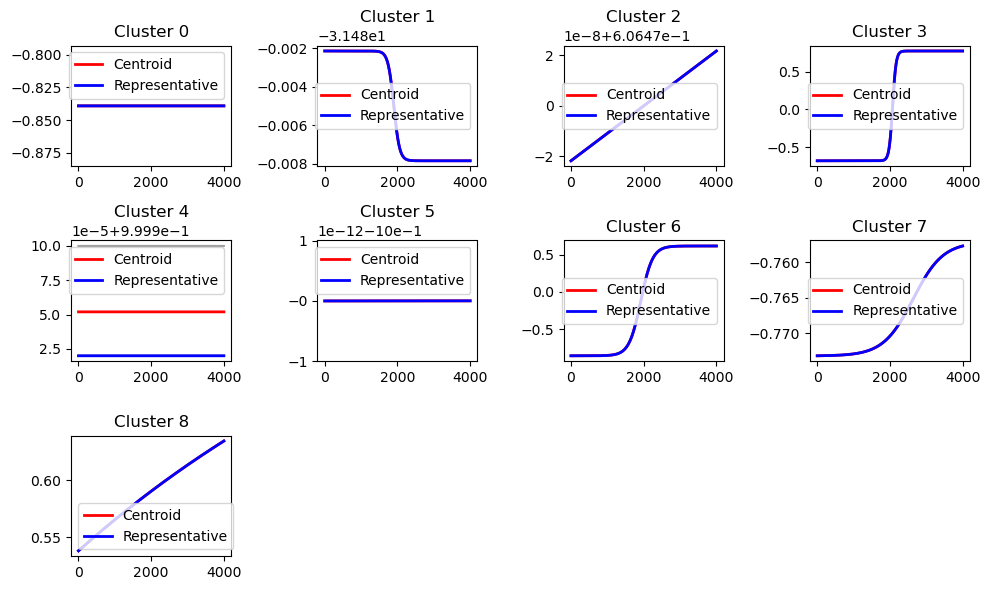

In [24]:
plt.figure(figsize=(10, 6))
for cluster_id in range(n_clusters):
    plt.subplot(3, 4, cluster_id + 1)
    for idx in np.where(y_pred_euc == cluster_id)[0]:
        plt.plot(X_train[idx].ravel(), "gray", alpha=0.5)
    plt.plot(centroids[cluster_id].ravel(), "red", label="Centroid", linewidth=2)
    plt.plot(X_train[closest_indices[cluster_id]].ravel(), "blue", label="Representative", linewidth=2)
    plt.title(f"Cluster {cluster_id}")
    plt.legend()
plt.tight_layout()
plt.show()


Euclidean k-means


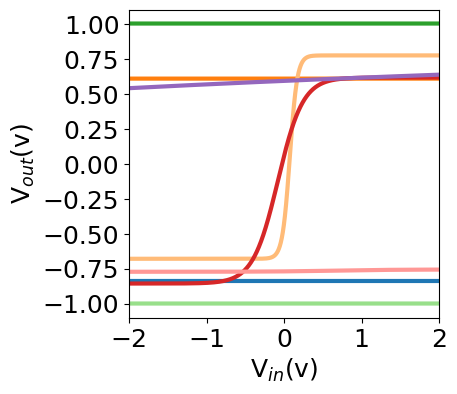

In [27]:
colors = plt.cm.tab20.colors

plt.figure(figsize=(4, 4))

# Euclidean k-means
print("Euclidean k-means")
plt.subplot(1, 1, 1)
for yi in range(n_clusters):
    if yi == 1:
        continue
    for j, xx in enumerate(X_train[y_pred_euc == yi]):
        plt.plot(x, xx.ravel(), '--', color=colors[yi], label='fault {}'.format(label[y_pred_euc == yi][0][0]), alpha=0.1)
    plt.plot(x, km.cluster_centers_[yi].ravel(), color=colors[yi], linewidth=3)
    
    plt.xlim(-2, 2)
    # plt.legend()
    plt.xlabel("V$_{in}$(v)", fontsize=18, )
    plt.ylabel("V$_{out}$(v)", fontsize=18, )
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    
    if yi == 1:
        plt.title("Euclidean $k$-means")